### Para entrenar el modelo necesitaremos primero 2 librerias que sera roboflow para descargar el dataset que necesitamos para las placas vehiculares y ultralytics para ver que modelo de ("en este caso") YOLO usaremos

In [1]:
!pip install roboflow ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 60.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


### Descargamos el dataset desde roboflow

In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="aH91y06SwNVKFx7KGo2g")
project = rf.workspace("ev-dshfb").project("license-plate-w8chc")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to license-plate-1 in yolov11:: 100%|██████████| 2606/2606 [00:00<00:00, 6267.57it/s]


### Al terminar de descargar el dataset es hora de elegir el modelo de base que usaremos en este caso YOLOv11

In [5]:
from ultralytics import YOLO
modelo = YOLO("yolo11n.pt")

### Ahora entrenaremos el YOLOv11

In [6]:
datos_path = "/content/license-plate-1/data.yaml"
resultados = modelo.train(data = datos_path,
                       epochs = 15,
                       imgsz = 640)

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/license-plate-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, 

### Realizamos Validaciones

In [7]:
modelo_personalizado = YOLO("/content/runs/detect/train/weights/best.pt")

In [8]:
resultados = modelo_personalizado("/content/license-plate-1/test/images/4onkhaa2opca1_jpg.rf.11f8bd840b1485d21b8e5abc8d6ed367.jpg")


image 1/1 /content/license-plate-1/test/images/4onkhaa2opca1_jpg.rf.11f8bd840b1485d21b8e5abc8d6ed367.jpg: 640x640 1 2, 11.3ms
Speed: 4.4ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


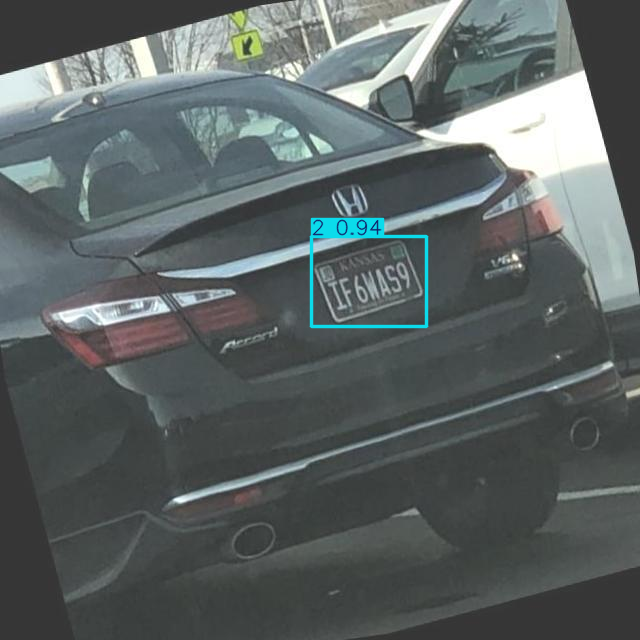

In [9]:
for r in resultados:
  r.show()